In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv("planetary_systems.csv", sep=',',comment='#', low_memory=False)
print("Original Shape:", df.shape)
df.head()

Original Shape: (39212, 289)


,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_dr2_id,gaia_dr3_id,default_flag,...,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,1,...,2023-09-19,2023-08,2023-09-19,2.0,1.0,2.0,0.0,0.0,0.0,0.0
1,2,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,0,...,2014-05-14,2008-01,2014-05-14,2.0,1.0,2.0,0.0,0.0,0.0,0.0
2,3,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,0,...,2014-07-23,2011-08,2014-07-23,2.0,1.0,2.0,0.0,0.0,0.0,0.0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,Gaia DR3 1696798367260229376,0,...,2018-04-25,2009-10,2014-05-14,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,5,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,Gaia DR3 1696798367260229376,1,...,2018-09-04,2017-03,2018-09-06,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [18]:
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39212 entries, 0 to 39211
Columns: 289 entries, rowid to pl_ndispec
dtypes: float64(254), int64(7), object(28)
memory usage: 86.5+ MB


,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_dr2_id,gaia_dr3_id,default_flag,...,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
count,39212.000000,39212,39212,39212,2903,3169,38429,38127,37890,39212.000000,...,39161,39162,39162,39162.000000,39162.000000,39162.000000,39162.000000,39162.000000,39162.000000,39162.000000
unique,NaN,6065,4524,8,728,769,4258,4217,4192,NaN,...,512,303,483,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,TrES-2 b,Kepler-11,b,HD 75732,HIP 43587,TIC 169175503,Gaia DR2 2076960598545789824,Gaia DR3 2076960598545789824,NaN,...,2018-09-25,2018-08-16,2018-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,34,103,28312,61,61,103,103,103,NaN,...,2843,2735,2735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,19606.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.154672,...,NaN,NaN,NaN,1.023518,0.470533,0.195879,0.110132,0.108626,0.214443,0.005439
std,11319.673714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.361596,...,NaN,NaN,NaN,1.124503,3.796267,0.887284,0.778205,0.931585,1.579140,0.153759
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9803.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19606.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29409.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [19]:
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])
df.isnull().sum()


,0
rowid,0
pl_name,0
hostname,0
pl_letter,0
hd_name,0
...,...
st_nrvc,0
st_nspec,0
pl_nespec,0
pl_ntranspec,0


In [20]:
for col in cat_cols:
    df[col] = df[col].str.lower().str.strip()

df[cat_cols].head()

,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_dr2_id,gaia_dr3_id,discoverymethod,disc_refname,...,pl_tsystemref,st_refname,st_spectype,st_metratio,sy_refname,rastr,decstr,rowupdate,pl_pubdate,releasedate
0,11 com b,11 com,b,hd 107383,hip 60202,tic 72437047,gaia dr2 3946945413106333696,gaia dr3 3946945413106333696,radial velocity,<a refstr=liu_et_al__2008 href=https://ui.adsa...,...,jd,<a refstr=teng_et_al__2023 href=https://ui.ads...,g8 iii,[fe/h],<a refstr=stassun_et_al__2019 href=https://ui....,12h20m42.91s,+17d47m35.71s,2023-09-19,2023-08,2023-09-19
1,11 com b,11 com,b,hd 107383,hip 60202,tic 72437047,gaia dr2 3946945413106333696,gaia dr3 3946945413106333696,radial velocity,<a refstr=liu_et_al__2008 href=https://ui.adsa...,...,bjd,<a refstr=liu_et_al__2008 href=https://ui.adsa...,g8 iii,[fe/h],<a refstr=stassun_et_al__2019 href=https://ui....,12h20m42.91s,+17d47m35.71s,2014-05-14,2008-01,2014-05-14
2,11 com b,11 com,b,hd 107383,hip 60202,tic 72437047,gaia dr2 3946945413106333696,gaia dr3 3946945413106333696,radial velocity,<a refstr=liu_et_al__2008 href=https://ui.adsa...,...,bjd,<a refstr=kunitomo_et_al__2011 href=https://ui...,g0 v,[fe/h],<a refstr=stassun_et_al__2019 href=https://ui....,12h20m42.91s,+17d47m35.71s,2014-07-23,2011-08,2014-07-23
3,11 umi b,11 umi,b,hd 136726,hip 74793,tic 230061010,gaia dr2 1696798367260229376,gaia dr3 1696798367260229376,radial velocity,<a refstr=dollinger_et_al__2009 href=https://u...,...,bjd,<a refstr=dollinger_et_al__2009 href=https://u...,k4 iii,[fe/h],<a refstr=stassun_et_al__2019 href=https://ui....,15h17m05.90s,+71d49m26.19s,2018-04-25,2009-10,2014-05-14
4,11 umi b,11 umi,b,hd 136726,hip 74793,tic 230061010,gaia dr2 1696798367260229376,gaia dr3 1696798367260229376,radial velocity,<a refstr=dollinger_et_al__2009 href=https://u...,...,bjd,<a refstr=stassun_et_al__2017 href=https://ui....,g0 v,[fe/h],<a refstr=stassun_et_al__2019 href=https://ui....,15h17m05.90s,+71d49m26.19s,2018-09-04,2017-03,2018-09-06


In [21]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print(df.shape)
df.head()

(39212, 42818)


,rowid,default_flag,sy_snum,sy_pnum,sy_mnum,cb_flag,disc_year,rv_flag,pul_flag,ptv_flag,...,releasedate_2025-09-17,releasedate_2025-09-25,releasedate_2025-10-02,releasedate_2025-10-09,releasedate_2025-10-30,releasedate_2025-11-13,releasedate_2025-11-20,releasedate_2025-12-04,releasedate_2025-12-11,releasedate_2025-12-18
0,1,1,2,1,0,0,2007,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,2,0,2,1,0,0,2007,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,3,0,2,1,0,0,2007,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,4,0,1,1,0,0,2009,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,5,1,1,1,0,0,2009,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [22]:
current_num_cols = df.select_dtypes(include=[np.number, bool]).columns

for col in current_num_cols:
    if df[col].dtype == 'bool':
        continue

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    if IQR > 0:
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

print("Shape after winsorization (clipping) of outliers:", df.shape)

Shape after winsorization (clipping) of outliers: (39212, 42818)


In [23]:
df["Habitability_Score"] = (
    (1 / (abs(df["pl_eqt"] - 288) + 1)) +
    (1 / (df["pl_radj"] + 1)) +
    (1 / (df["pl_bmassj"] + 1))
)

df["Stellar_Compatibility"] = (
    (1 / (df["st_teff"] + 1)) +
    (1 / (df["st_rad"] + 1))
)

df[["Habitability_Score","Stellar_Compatibility"]].head()

/tmp/ipython-input-366615498.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Habitability_Score"] = (
/tmp/ipython-input-366615498.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Stellar_Compatibility"] = (


,Habitability_Score,Stellar_Compatibility
0,0.892442,0.365369
1,0.880723,0.365374
2,0.886952,0.512522
3,0.918660,0.365394
4,0.895236,0.365401


In [24]:
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols].describe()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.12/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


,rowid,default_flag,sy_snum,sy_pnum,sy_mnum,cb_flag,disc_year,rv_flag,pul_flag,ptv_flag,...,sy_kepmag,sy_kepmagerr1,sy_kepmagerr2,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
count,39212.000000,39212.000000,39212.000000,39212.000000,39212.0,39212.000000,39212.000000,39212.000000,39212.000000,39212.000000,...,39212.000000,0.0,0.0,39212.000000,39212.000000,39212.000000,39212.000000,39212.00000,39212.000000,39212.000000
mean,0.500000,0.154672,0.028384,0.315664,0.0,0.002397,0.549038,0.250357,0.000332,0.000051,...,0.477016,NaN,NaN,0.063968,0.006713,0.016302,0.008461,0.00571,0.006693,0.000905
std,0.288686,0.361596,0.102735,0.374351,0.0,0.048903,0.297577,0.433224,0.018205,0.007142,...,0.211408,NaN,NaN,0.070237,0.054198,0.073895,0.059824,0.04900,0.049317,0.025610
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.250000,0.000000,0.000000,0.000000,0.0,0.000000,0.375000,0.000000,0.000000,0.000000,...,0.375000,NaN,NaN,0.062500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.625000,0.000000,0.000000,0.000000,...,0.512017,NaN,NaN,0.062500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.750000,0.000000,0.000000,0.400000,0.0,0.000000,0.625000,1.000000,0.000000,0.000000,...,0.625000,NaN,NaN,0.062500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


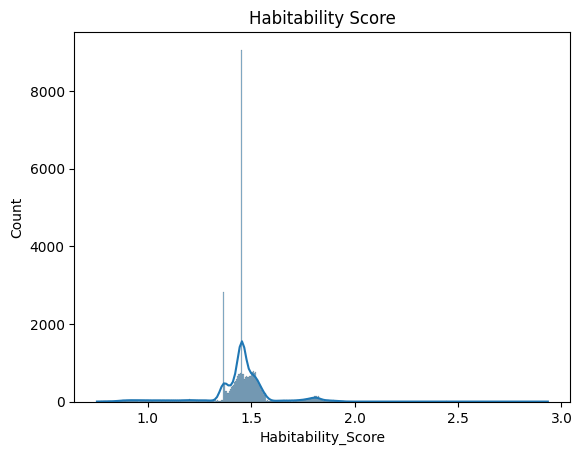

In [25]:
sns.histplot(df["Habitability_Score"], kde=True)
plt.title("Habitability Score")
plt.show()


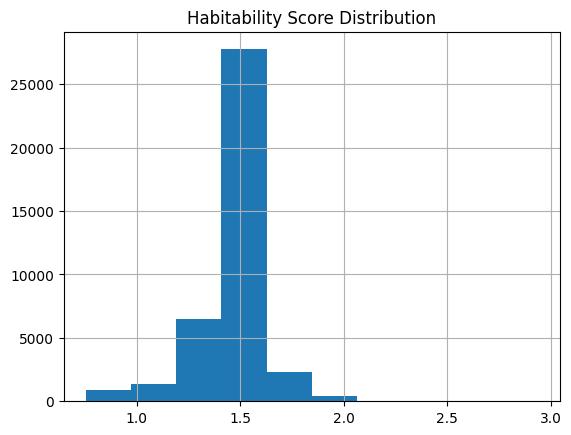

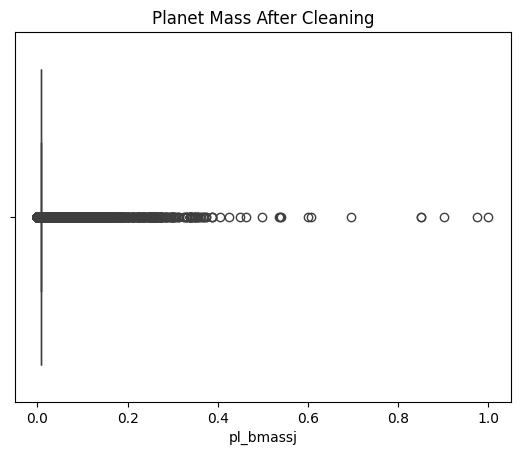

In [26]:
plt.figure()
df["Habitability_Score"].hist()
plt.title("Habitability Score Distribution")
plt.show()

plt.figure()
sns.boxplot(x=df["pl_bmassj"])
plt.title("Planet Mass After Cleaning")
plt.show()

In [27]:
completeness = (df.notnull().sum() / len(df)) * 100
numeric_cols = df.select_dtypes(include=["int64","float64"]).columns
valid_numeric = df[numeric_cols].apply(lambda x: x.notnull() & np.isfinite(x)).mean() * 100

# Overall quality score
quality_score = (completeness.mean() + valid_numeric.mean()) / 2

print("Completeness Check:")
print(completeness)
print("Average Completeness:", round(completeness.mean(),2), "%")
print("Valid Numeric Values:", round(valid_numeric.mean(),2), "%")
print("Overall Data Quality Score:", round(quality_score,2), "%")

Completeness Check:
rowid                     100.0
default_flag              100.0
sy_snum                   100.0
sy_pnum                   100.0
sy_mnum                   100.0
                          ...  
releasedate_2025-12-04    100.0
releasedate_2025-12-11    100.0
releasedate_2025-12-18    100.0
Habitability_Score        100.0
Stellar_Compatibility     100.0
Length: 42820, dtype: float64
Average Completeness: 100.0 %
Valid Numeric Values: 99.24 %
Overall Data Quality Score: 99.62 %


In [28]:
threshold = df["Habitability_Score"].median()

df["Habitability_Class"] = np.where(
    df["Habitability_Score"] >= threshold, 1, 0
)

df["Habitability_Class"].value_counts()


/tmp/ipython-input-1736165862.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Habitability_Class"] = np.where(


,count
Habitability_Class,
1,24734
0,14478


In [29]:
important_cols = [
    "pl_eqt", "pl_radj", "pl_bmassj",
    "st_teff", "st_rad"
]

corr = df[important_cols].apply(
    lambda x: x.corr(df["Habitability_Score"])
)

selected_features = corr.sort_values(ascending=False).index.tolist()
selected_features


['pl_eqt', 'st_teff', 'st_rad', 'pl_radj', 'pl_bmassj']

In [30]:
X = df[selected_features]
y = df["Habitability_Class"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (39212, 5)
y shape: (39212,)


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape)
print("Test size :", X_test.shape)


Train size: (31369, 5)
Test size : (7843, 5)


In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

scaler_pipeline = Pipeline([
    ("scaler", MinMaxScaler())
])

X_train_scaled = scaler_pipeline.fit_transform(X_train)
X_test_scaled = scaler_pipeline.transform(X_test)


In [44]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(
    max_iter=1000,
    random_state=42
)

lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_prob = lr_model.predict_proba(X_test_scaled)[:, 1]


In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Accuracy :", accuracy_score(y_test, lr_pred))
print("Precision:", precision_score(y_test, lr_pred))
print("Recall   :", recall_score(y_test, lr_pred))
print("F1 Score :", f1_score(y_test, lr_pred))
print("ROC-AUC  :", roc_auc_score(y_test, lr_prob))


Accuracy : 0.8782353691189596
Precision: 0.8591219863260166
Recall   : 0.9652314534061047
F1 Score : 0.9090909090909091
ROC-AUC  : 0.9679805524191792


In [46]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

rf_pred = rf_model.predict(X_test_scaled)
rf_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

print("Accuracy :", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred))
print("Recall   :", recall_score(y_test, rf_pred))
print("F1 Score :", f1_score(y_test, rf_pred))
print("ROC-AUC  :", roc_auc_score(y_test, rf_prob))


Accuracy : 0.9994899910748438
Precision: 0.9997977755308393
Recall   : 0.9993935718617344
F1 Score : 0.9995956328346138
ROC-AUC  : 0.9999972777742413


In [38]:
df["Predicted_Habitability_Probability"] = rf_model.predict_proba(
    scaler_pipeline.transform(X)
)[:, 1]

df.sort_values(
    by="Predicted_Habitability_Probability",
    ascending=False
)[
    ["Habitability_Score", "Predicted_Habitability_Probability"]
].head(10)


/tmp/ipython-input-364331240.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Predicted_Habitability_Probability"] = rf_model.predict_proba(


,Habitability_Score,Predicted_Habitability_Probability
39072,1.829349,1.0
39073,1.832974,1.0
33995,1.469959,1.0
33828,1.468687,1.0
33829,1.485784,1.0
33840,1.504414,1.0
39075,1.834279,1.0
39076,1.828630,1.0
39079,1.828130,1.0
11669,1.463013,1.0
